***
# Homework 2

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu

***

In [8]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1.

**Assume $x_t$ satisfies the SDE:**
$$d x_t = a_t\;dt + b_t\;dW_t,$$

## (a.)

**Derive the SDE of $f(x_t)$ when $f(x_t)=\frac{1}{2}x^2_t$**

Computing the first derivative:
$$ f'(x_t) = \frac{d}{dx_t}\bigg(\frac{1}{2}x_t^2\bigg) = \frac{1}{2} \cdot 2 \cdot x_t = x_t$$

Computing the second derivative:
$$f''(x_t) = \frac{d}{dx}(x_t) = 1$$

Now, applying the second order taylor expansion, we have that:
\begin{equation*}
    \begin{split}
    d\,f(x_t) &= \frac{1}{1!} \cdot \frac{\partial f}{\partial x_t} dx_t + \frac{1}{2!} \cdot \frac{\partial^2 f}{\partial x_t^2} (dx_t)^2\\
              &= f'(x_t)\,dx_t + \frac{1}{2} f''(x_t)\,(dx_t)^2\\
              &= x_t\,dx_t + \frac{1}{2}\,d(x_t)^2\\
              &= x_t \,(a_t\;dt + b_t\;dW_t) + \frac{1}{2}\,(a_t\;dt + b_t\;dW_t)^2
    \end{split}
\end{equation*}

Now, in order to simplify the second term:
\begin{equation*}
    \begin{split}
    (a_t\;dt + b_t\;dW_t)^2 &= a^2_t\;\underbrace{dt^2}_{=0} + b^2_t\;\underbrace{dW^2_t}_{=dt} + 2a_t\,b_t\underbrace{\,dt\,dW_t}_{=0}\\
    &= b^2_t\;dt
    \end{split}
\end{equation*}

This gives us that:
\begin{equation*}
    \begin{split}
    d\,f(x_t) &= x_t \,(a_t\;dt + b_t\;dW_t) + \frac{1}{2}\,b_t^2\;dt\\
    &= \bigg(x_ta_t + \frac{1}{2}b^2_t\bigg)\;dt + x_tb_t\;dW_t
    \end{split}
\end{equation*}

as required.

## (b.)

**Derive the SDE of $f(W_t)$ when $f(W_t)=W^4_t$**

Computing the first derivative:
$$ f'(W_t) = \frac{d}{dW_t}\bigg(W_t^4\bigg) = 4W_t^3$$

Computing the second derivative:
$$f''(W_t) = \frac{d}{dW_t}(4W_t^3) = 12W_t^2$$

Now, applying the second order taylor expansion, we have that:
\begin{equation*}
    \begin{split}
    d\,f(W_t) &= \frac{1}{1!} \cdot \frac{\partial f}{\partial W_t} dW_t + \frac{1}{2!} \cdot \frac{\partial^2 f}{\partial W_t^2} (dW_t)^2\\
              &= f'(W_t)\,dW_t + \frac{1}{2} f''(W_t)\,dW_t^2\\
              &= 4W_t^3\,dW_t + \frac{1}{2}\,12W_t^2\,\underbrace{dW_t^2}_{=dt}\\
              &= 4W_t^3\,dW_t + 6W_t^2\,dt\\
    \end{split}
\end{equation*}

as required.

# Question 2.

**Consider a two-state Markov chain with state space $S=\{1,2\}$ and transition probabilities $p=0.125$ and $q=0.25$. Numerically generate a long time series, using which to compute the expectation, the probability at each state, and the $n$-step transition probability matrix for $n=10$ and $n=100$. Compare your numerical results with the theoretical solutions.**

Given state space $S=\{1, 2\}$ with transition probabiltiies $p=0.125$ and $q=0.25$, we have the following transition matrix:
$$P = \begin{bmatrix} 1-p & p\\ q & 1-q \end{bmatrix} = \begin{bmatrix} 0.875 & 0.125\\ 0.25 & 0.75 \end{bmatrix}$$

![State Space and Associated Probabilities](https://raw.githubusercontent.com/Stochastic1017/MATH_616/refs/heads/main/Homeworks/Homework_2/state_space.png)

Let initial distribution $\alpha = [0.5, 0.5]$,  i.e., there is a 50-50 chance that initial state is $1$ or $2$.

Now, let $n$ be the number of steps taken in this random walk. We know that, for $n \to \infty$, the stationary distribution is defined as follows:
$$ \pi = \pi P $$
where $\pi$ is a row vector of probabilities that add up to 1.

Solving for $\pi$, we have that:
\begin{equation*}
    \begin{split}
        \begin{bmatrix} \pi_1 & \pi_2 \end{bmatrix} &= \begin{bmatrix} \pi_1 & \pi_2 \end{bmatrix} \cdot  \begin{bmatrix} 0.875 & 0.125\\ 0.25 & 0.75 \end{bmatrix}\\
        \begin{bmatrix} \pi_1 & \pi_2 \end{bmatrix} &= \begin{bmatrix} \pi_1 \cdot 0.875 + \pi_2 \cdot 0.25 & \pi_1 \cdot 0.125 + \pi_2 \cdot 0.75 \end{bmatrix}\\
    \end{split}
\end{equation*}

From above, we have the following system of equations:
$$ \pi_1 = \pi_1 \cdot 0.875 + \pi_2 \cdot 0.25, \quad \pi_2 = \pi_1 \cdot 0.125 + \pi_2 \cdot 0.75 $$

From which, we can gather that: $\pi_1 = 2 \cdot \pi_2$. Now, as we know $\pi_1 + \pi_2 = 1$, we conclude that:
$$ \pi_1 = 0.\bar{66}, \pi_2 = 0.\bar{33}$$ 

Using above, we have that, the expectation (or mean) of the state $S$ will be:
$$ \mathbb{E}[S] = 1 \cdot 0.\bar{66} + 2 \cdot 0.\bar{33} \approx 1.\bar{33}$$

Similarly, we also have the theoretical long-run n-step transition matrix:
$$ \lim_{n \to \infty} P^{(n)} = \begin{bmatrix} \pi_1 & \pi_2\\ \pi_1 & \pi_2 \end{bmatrix} = \begin{bmatrix} 2/3 & 1/3\\ 2/3 & 1/3 \end{bmatrix}$$ 

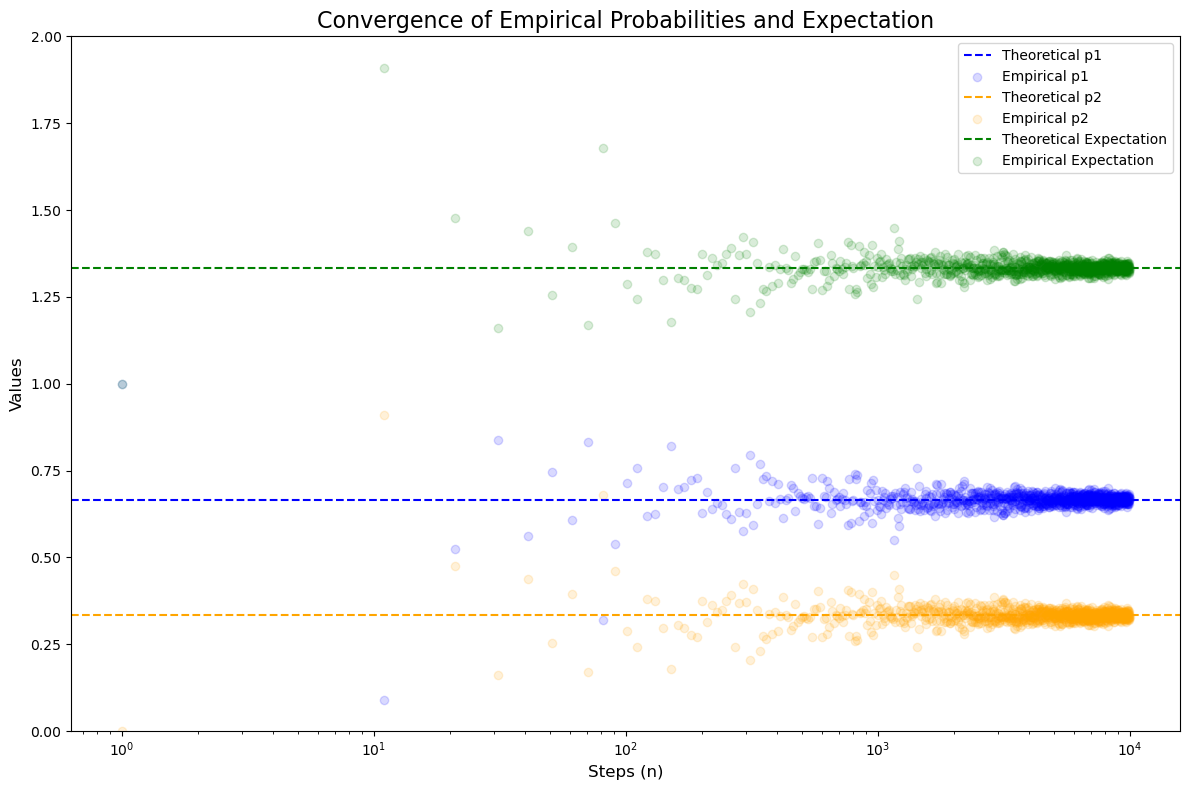

In [9]:
def random_walk(states, trans, alpha, n):
    path = np.zeros(n, dtype=int)
    path[0] = np.random.choice(states, p=alpha)
    for i in range(1, n):
        current_state = int(path[i-1]) - 1
        path[i] = np.random.choice(states, p=trans[current_state, :])
    return path

def n_step_transition_matrix(trans, n):
    return np.linalg.matrix_power(trans, n)

states = np.array([1, 2])
trans = np.array([[0.875, 0.125], 
                  [0.25, 0.75]])

theoretical_p1 = 2/3
theoretical_p2 = 1/3
theoretical_expectation = 1*theoretical_p1 + 2*theoretical_p2
theoretical_transition = np.array([[theoretical_p1, theoretical_p2], 
                                   [theoretical_p1, theoretical_p2]])

n = range(1, 10000, 10)
empirical_p1 = []
empirical_p2 = []
empirical_expectation = []
for i in n:
      path = random_walk(states, trans, alpha=[0.5, 0.5], n=i)
      empirical_p1.append(np.mean(path==1))
      empirical_p2.append(np.mean(path==2))
      empirical_expectation.append(np.mean(path))

fig, ax = plt.subplots(figsize=(12, 8))

# Plot empirical p1
ax.axhline(theoretical_p1, color='blue', linestyle='--', label='Theoretical p1')
ax.scatter(n, empirical_p1, label='Empirical p1', color='blue', alpha=0.15)

# Plot empirical p2
ax.axhline(theoretical_p2, color='orange', linestyle='--', label='Theoretical p2')
ax.scatter(n, empirical_p2, label='Empirical p2', color='orange', alpha=0.15)

# Plot empirical expectation
ax.axhline(theoretical_expectation, color='green', linestyle='--', label='Theoretical Expectation')
ax.scatter(n, empirical_expectation, label='Empirical Expectation', color='green', alpha=0.15)

# Labels and title
ax.set_xscale('log')
ax.set_title('Convergence of Empirical Probabilities and Expectation', fontsize=16)
ax.set_xlabel('Steps (n)', fontsize=12)
ax.set_ylabel('Values', fontsize=12)

# Setting y-limits for clarity
ax.set_ylim(0, 2)
ax.legend()

plt.tight_layout()
plt.show()

In [10]:
path_10 = random_walk(states, trans, alpha=[0.5, 0.5], n=10)
ten_step_trans = n_step_transition_matrix(trans, n=10)

df_10 = pd.DataFrame({
    'Metric': ['p1', 'p2', 'expectation'],
    'Empirical': [np.mean(path_10==1), np.mean(path_10==2), np.mean(path_10)],
    'Theoretical': [theoretical_p1, theoretical_p2, theoretical_expectation],
    'Absolute Difference': [np.abs(np.mean(path_10==1)-np.asarray(theoretical_p1)),
                            np.abs(np.mean(path_10==2)-np.asarray(theoretical_p2)),
                            np.abs(np.mean(path_10)-np.asarray(theoretical_expectation))]
})

print("theoretical vs empirical probabilities and expectations (n=10):\n")
print(df_10)
print('\n')
print("Difference between long-run transition matrix and 10-step transition matrix:\n")
print(f"{theoretical_transition-ten_step_trans}")

theoretical vs empirical probabilities and expectations (n=10):

        Metric  Empirical  Theoretical  Absolute Difference
0           p1        0.5     0.666667             0.166667
1           p2        0.5     0.333333             0.166667
2  expectation        1.5     1.333333             0.166667


Difference between long-run transition matrix and 10-step transition matrix:

[[-0.00303165  0.00303165]
 [ 0.0060633  -0.0060633 ]]


In [11]:
path_100 = random_walk(states, trans, alpha=[0.5, 0.5], n=100)
hundred_step_trans = n_step_transition_matrix(trans, n=100)

df_100 = pd.DataFrame({
    'Metric': ['p1', 'p2', 'expectation'],
    'Empirical': [np.mean(path_100==1), np.mean(path_100==2), np.mean(path_100)],
    'Theoretical': [theoretical_p1, theoretical_p2, theoretical_expectation],
    'Absolute Difference': [np.abs(np.mean(path_100==1)-np.asarray(theoretical_p1)),
                            np.abs(np.mean(path_100==2)-np.asarray(theoretical_p2)),
                            np.abs(np.mean(path_100)-np.asarray(theoretical_expectation))]
})

print("theoretical vs empirical probabilities and expectations (n=100):\n")
print(df_100)
print('\n')
print("Difference between long-run transition matrix and 100-step transition matrix:\n")
print(f"{theoretical_transition-hundred_step_trans}")

theoretical vs empirical probabilities and expectations (n=100):

        Metric  Empirical  Theoretical  Absolute Difference
0           p1       0.83     0.666667             0.163333
1           p2       0.17     0.333333             0.163333
2  expectation       1.17     1.333333             0.163333


Difference between long-run transition matrix and 100-step transition matrix:

[[1.11022302e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


# Question 3.

**Use Monte Carlo simulations to compute the mean of a one-dimensional standard Gaussian distribution (with zero mean and variance being $1$). How many Monte Carlo sample points is needed if the standard error is less than $0.05$?**

We know that the formula for standard error ($SE$) is:
$$ SE = \frac{\sigma}{\sqrt{n}} $$

Therefore, in order to achieve standard error less than 0.05, i.e., $SE < 0.05$:
\begin{equation*}
    \begin{split}
        0.05 &> \frac{1}{\sqrt{n}}\\
        0.05 \cdot \sqrt{n}  &> 1\\
        (0.05 \cdot \sqrt{n})^2 &> 1^2\\
        0.0025n &> 1\\
        n &> 400
    \end{split}
\end{equation*}

Thus, we conclude that we need a sample of **at least 400** to achieve a standard error less than $0.05$.

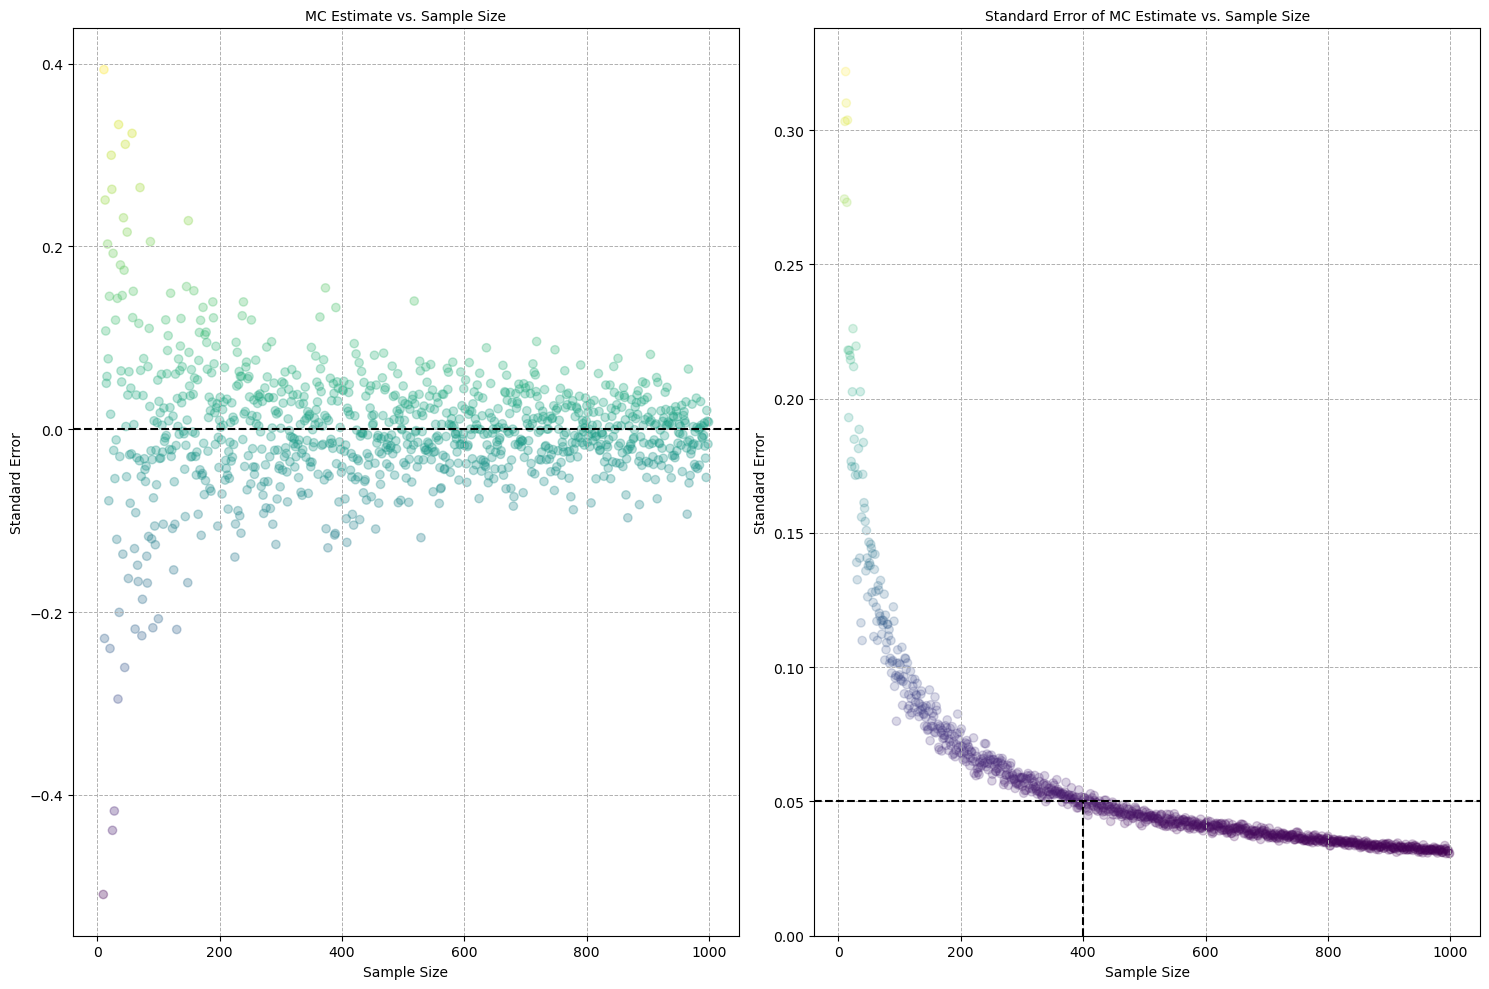

In [12]:
def monte_carlo_mean_and_se(num_points, mean, var):
    """  
    Monte Carlo Simulations to estimate mean for single variable gaussian distribution.
    """
    samples = np.random.normal(mean, var, num_points)    
    mean_estimate = np.mean(samples)    
    standard_error = np.std(samples) / np.sqrt(num_points)
    return mean_estimate, standard_error

mean_estimates = []
standard_errors = []
sample_sizes = range(10, 1000)
for sample_size in sample_sizes:
    mean_estimate, standard_error = monte_carlo_mean_and_se(sample_size, 
                                                            mean=0, 
                                                            var=1)
    mean_estimates.append(mean_estimate)
    standard_errors.append(standard_error)


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

#################
### Left Subplot
#################

norm = plt.Normalize(min(mean_estimates), max(mean_estimates))
colors = plt.cm.viridis(norm(mean_estimates))
sc = ax0.scatter(sample_sizes, 
                 mean_estimates, 
                 c=mean_estimates, 
                 cmap='viridis', 
                 marker="o", 
                 alpha=0.3, 
                 label="Standard Error")

ax0.axhline(y=0, color="black", linestyle="--")
ax0.set_title("MC Estimate vs. Sample Size", fontsize=10)
ax0.set_xlabel("Sample Size", fontsize=10)
ax0.set_ylabel("Standard Error", fontsize=10)
ax0.grid(True, which='both', linestyle='--', linewidth=0.7)

##################
### Right Subplot
##################

norm = plt.Normalize(min(standard_errors), max(standard_errors))
colors = plt.cm.viridis(norm(standard_errors))
sc = ax1.scatter(sample_sizes, 
                 standard_errors, 
                 c=standard_errors, 
                 cmap='viridis', 
                 marker="o", 
                 alpha=0.2, 
                 label="Standard Error")

ax1.axhline(y=0.05, color="black", linestyle="--")
ax1.plot([400, 400], [0, 0.05], color="black", linestyle="--")
ax1.set_title("Standard Error of MC Estimate vs. Sample Size", fontsize=10)
ax1.set_xlabel("Sample Size", fontsize=10)
ax1.set_ylabel("Standard Error", fontsize=10)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
ax1.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# Question 4.

**Please use Monte Carlo simulation to compute $\sqrt{2}$. Show the standard error as a function of number of samples.**

The Monte Carlo Simuilation algorithm to compute square root of any non-negative number $n$ is as follows:

First, we fix `num_samples` that decides how many times to run the sampling. The larger the number, the more accurate our estimate. Then, our algorithm is as follows:

1. Initialize `points_inside=0`.

2. Randomly sample from uniform distribution between 0, $n$.

3. If random sample squared <= 2, then add one to `points_inside`. Else, resample and repeat 3.

4. After the samples are exhausted, we take the proportion `points_inside/num_samples` and multiply it with our desired square root integer $n$.

In [13]:
def monte_carlo_sqrt(n, num_samples=10000):
    
    """
    Use monte carlo simulation to estimate square root of a number.
    """

    points_inside=0
    for _ in range(num_samples):
        if random.uniform(0, n)**2 <= n:
            points_inside += 1
    estimate = n * (points_inside / num_samples)
    return estimate, np.abs(np.sqrt(n) - estimate)

for i in range(20):
    estimate, error = monte_carlo_sqrt(i)
    print(f"Estimate of sqrt({i}): {estimate}")
    print(f"Absolute error of estimate: {error}")
    print('\n')

Estimate of sqrt(0): 0.0
Absolute error of estimate: 0.0


Estimate of sqrt(1): 1.0
Absolute error of estimate: 0.0


Estimate of sqrt(2): 1.4342
Absolute error of estimate: 0.019986437626904774


Estimate of sqrt(3): 1.7361
Absolute error of estimate: 0.004049192431122783


Estimate of sqrt(4): 2.0028
Absolute error of estimate: 0.0028000000000001357


Estimate of sqrt(5): 2.241
Absolute error of estimate: 0.004932022500210298


Estimate of sqrt(6): 2.4114
Absolute error of estimate: 0.03808974278317789


Estimate of sqrt(7): 2.6858999999999997
Absolute error of estimate: 0.040148688935409016


Estimate of sqrt(8): 2.804
Absolute error of estimate: 0.024427124746190465


Estimate of sqrt(9): 3.0384
Absolute error of estimate: 0.03840000000000021


Estimate of sqrt(10): 3.128
Absolute error of estimate: 0.03427766016837941


Estimate of sqrt(11): 3.3
Absolute error of estimate: 0.016624790355399988


Estimate of sqrt(12): 3.4104
Absolute error of estimate: 0.05370161513775429


Estimat

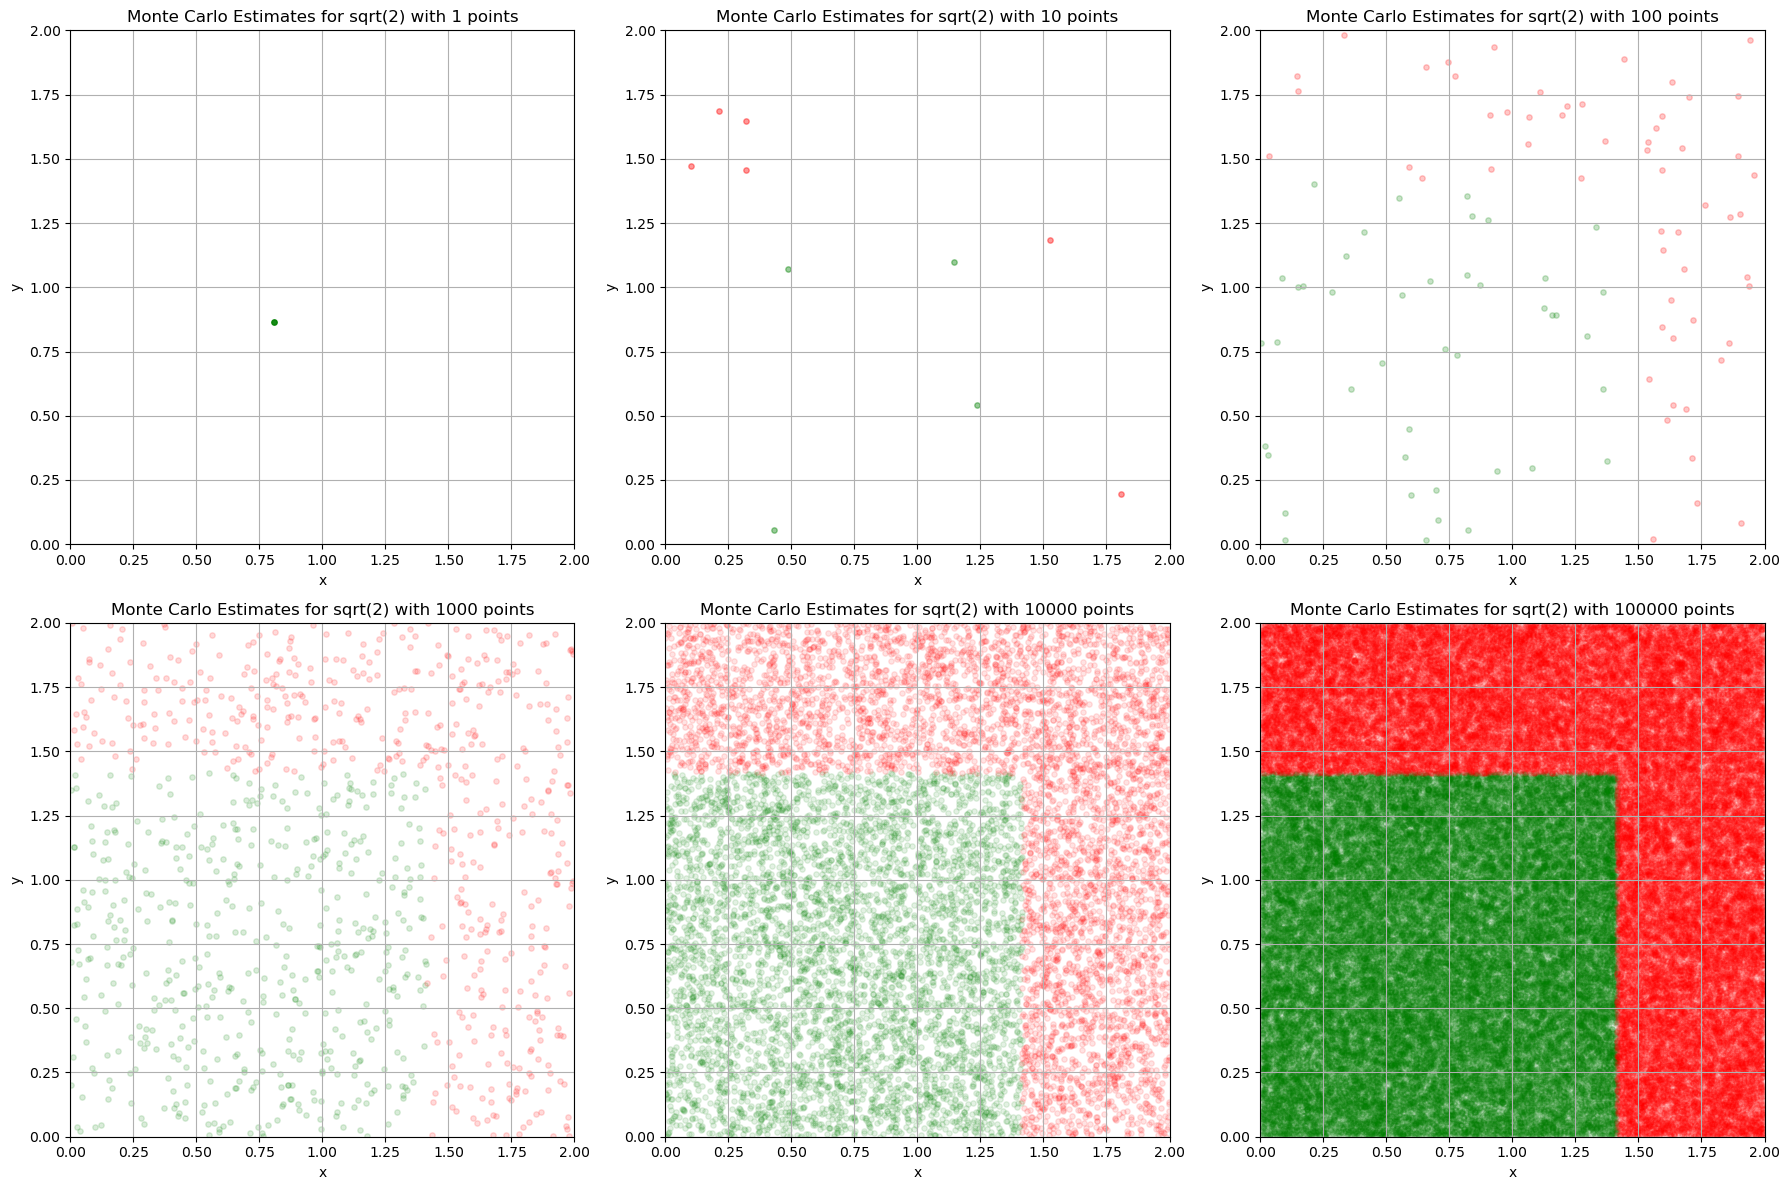

In [14]:
def plot_monte_carlo_sqrt_subplot(n, sample_sizes):

    """
    Create a 2x3 subplot to visualize the Monte Carlo simulation
    with different numbers of samples.
    """
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Changed to 2x3 grid
    
    for i, num_points in enumerate(sample_sizes):
        upper = n
        points_inside = []
        points_outside = []

        for _ in range(num_points):
            x = np.random.uniform(0, upper)
            y = np.random.uniform(0, upper)
        
            if (x**2 <= n) and (y**2 <=n):
                points_inside.append((x, y))
            else:
                points_outside.append((x, y))
    
        points_inside = np.array(points_inside)
        points_outside = np.array(points_outside)

        # Compute alpha, ensuring it is between 0 and 1
        alpha_value = min(1.0, 1 / np.log(num_points + 2))
        
        ax = axs[i//3, i%3]  # Adjusted for 2x3 grid

        if len(points_inside) > 0:
            ax.scatter(points_inside[:, 0], 
                        points_inside[:, 1], 
                        color='green',
                        alpha=alpha_value, 
                        s=15)

        if len(points_outside) > 0:
            ax.scatter(points_outside[:, 0], 
                        points_outside[:, 1], 
                        color='red',
                        alpha=alpha_value, 
                        s=15)

        ax.set_title(f"Monte Carlo Estimates for sqrt({n}) with {num_points} points")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.grid(True)
        
        ax.set_xlim(0, upper)
        ax.set_ylim(0, upper)
    
    plt.tight_layout()
    return fig, axs

# Call the function with 6 different sample sizes
sample_sizes = [1, 10, 100, 1000, 10000, 100000]
fig, axs = plot_monte_carlo_sqrt_subplot(2, sample_sizes)
plt.show()